<a href="https://colab.research.google.com/github/idonithid/ANN-From-Scratch-for-Digit-Recognition/blob/main/ANN_From_Scratch_for_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import random
import numpy as np
from numpy import asarray
from numpy import savetxt
from matplotlib import pyplot as plt
import pandas as pd
import time


**Creating the network and its functions**

In [86]:
class NeuralNetwork:

    def __init__(self,layer_sizes):
        # initializing network parameters
        weight_shapes = [(a,b) for a,b in zip(layer_sizes[1:],layer_sizes[:-1])]
        self.weights = [np.random.randn(s,s_1) for s,s_1 in zip(layer_sizes[:-1],layer_sizes[1:])]
        self.biases = [np.random.randn(s,1) for s in layer_sizes[1:]]
        self.num_layers = len(layer_sizes)

    def predict(self, a):
        # Predict number for given image
        for w,b in zip(self.weights,self.biases):
            a = sigmoid(np.dot(w.T,a)+b)
        return np.argmax(a)

    def get_accuracy(self,x,y):
        # Calculate Networks precision
        num_of_test = len(x)
        cnt = 0
        for i in range(len(x)):
            if self.predict(x[i]) == np.argmax(y[i]):
                cnt += 1
        precentage ="{:.1%}".format(cnt/num_of_test)
        return precentage

   
    def backprop(self,x,y):
        # calculate derivative of loss function given one image - backpropagation algorithm
        dB = [np.zeros(b.shape) for b in self.biases]
        dW = [np.zeros(w.shape) for w in self.weights]
        Z = []
        A = [x]
        H = self.num_layers
        activation = x
        for w,b in zip(self.weights,self.biases):
            z = np.dot(w.T,activation)+ b
            Z.append(z)
            activation = sigmoid(z)
            A.append(activation)

        delta = (A[-1]-y)*sigmoid_derivative(Z[-1])
        dB[-1] = delta
        dW[-1] = np.dot(A[-2],delta.T)
        for i in range(2,H):
            delta = sigmoid_derivative(Z[-i])*(np.dot(self.weights[-i+1],delta))
            dB[-i] = delta
            dW[-i] = np.dot(A[-i-1],delta.T)
        return (dW,dB)

    def GD(self,mini_batch,gamma):
        #Gradient descent
        dB = [np.zeros(b.shape) for b in self.biases]
        dW = [np.zeros(w.shape) for w in self.weights]
        k = len(mini_batch)
        for x,y in mini_batch:
            (partial_w, partial_b) = self.backprop(x,y)
            dB = [db + b for db, b in zip(dB,partial_b)]
            dW = [dw + w for dw, w in zip(dW, partial_w)]
        for i in range(self.num_layers-1):
            self.weights[i] = self.weights[i] -(gamma / k)*dW[i]
            self.biases[i] = self.biases[i] - (gamma / k)*dB[i]


    def train(self,x,y,epochs,gamma,mini_batch_size):
        #calculate weights ans biases while minimize the loss function
        training_data = [(a,b) for a,b in zip(x,y)]
        n = len(training_data)
        training_data = np.array(training_data,dtype="object")
        training_data = training_data.reshape((50000, 2))
        training_data = np.split(training_data, mini_batch_size)
        old_gamma = gamma
        for i in range(epochs):
            for mini_batch in training_data:
                self.GD(mini_batch, gamma)
                gamma = gamma/1.001
            gamma = old_gamma
            b=self.get_accuracy(x, y)
            if b >0.95:   #stop to not overfit
                return self.weights, self.biases
        return self.weights, self.biases


def sigmoid(x):
    a,b = x.shape
    x = x.reshape(max(a,b),min(a,b))
    h = np.zeros((max(a,b),min(a,b)))
    for i in range(max(a,b)):
        sig = 1.0 / (1.0 + np.exp(-x[i][0]))  # Define sigmoid function
        sig = np.minimum(sig, 0.9999)  # Set upper bound
        sig = np.maximum(sig, 0.0001)  # Set lower bound
        h[i][0] = sig
    return h

def sigmoid_derivative(x):
    a,b = x.shape
    x = x.reshape(max(a,b),min(a,b))
    h_1 = np.ones((max(a,b),min(a,b)))
    h = sigmoid(x)*(h_1-sigmoid(x))
    return h


**Import the data and train the network**





In [44]:

with np.load('mnist.npz') as data:
	training_images = data['training_images']
	training_labels = data['training_labels']
	test_images = data['test_images']
	test_lables = data['test_labels']


#init a Network
layer_sizes = (784,16,16,10)
net = NeuralNetwork(layer_sizes)
# train
w,b = net.train(training_images,training_labels,50,5,100)
#saving our updated weights and biases
savetxt('weights_0.csv', net.weights[0], delimiter=',')
savetxt('biases_0.csv', net.biases[0], delimiter=',')
savetxt('weights_1.csv', net.weights[1], delimiter=',')
savetxt('biases_1.csv', net.biases[1], delimiter=',')
savetxt('weights_2.csv', net.weights[2], delimiter=',')
savetxt('biases_2.csv', net.biases[2], delimiter=',')

**Test the network**



The accuracy of your network is: 91.6%
Now we will see examples:
image number: 1
Prediction:  2
Label:  2


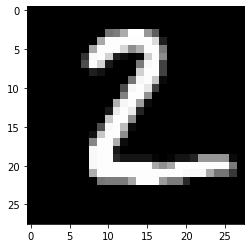

image number: 2
Prediction:  1
Label:  1


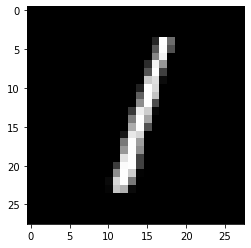

image number: 3
Prediction:  0
Label:  0


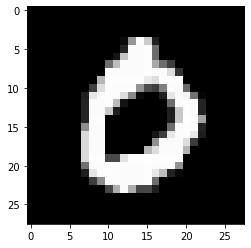

image number: 4
Prediction:  4
Label:  4


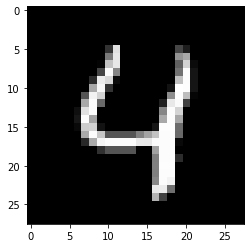

image number: 5
Prediction:  1
Label:  1


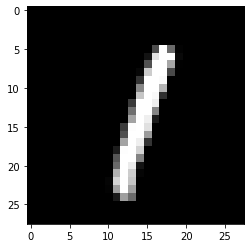

image number: 6
Prediction:  4
Label:  4


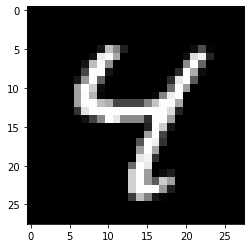

image number: 7
Prediction:  9
Label:  9


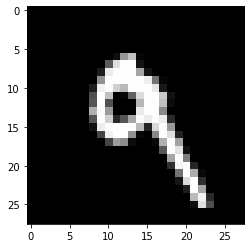

image number: 8
Prediction:  4
Label:  5


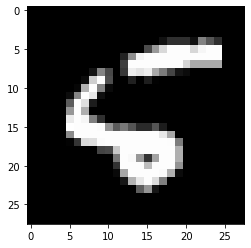

image number: 9
Prediction:  9
Label:  9


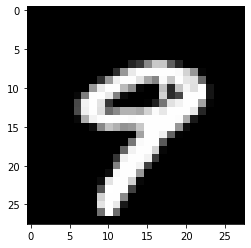

image number: 10
Prediction:  0
Label:  0


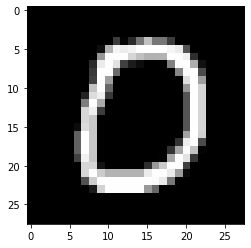

image number: 11
Prediction:  6
Label:  6


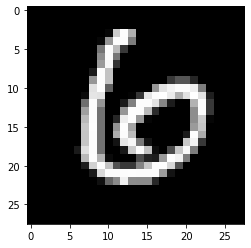

image number: 12
Prediction:  9
Label:  9


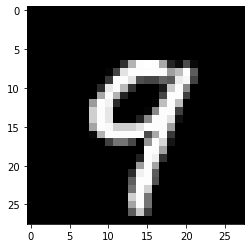

image number: 13
Prediction:  0
Label:  0


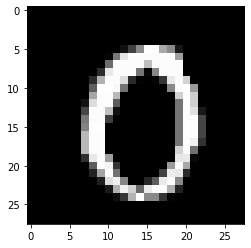

image number: 14
Prediction:  1
Label:  1


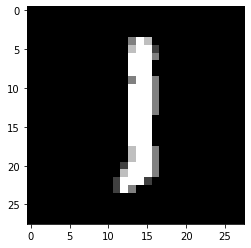

image number: 15
Prediction:  5
Label:  5


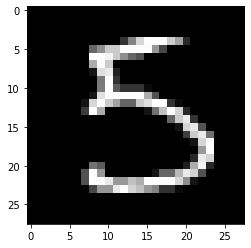

image number: 16
Prediction:  9
Label:  9


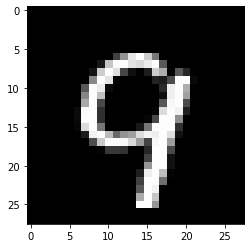

image number: 17
Prediction:  7
Label:  7


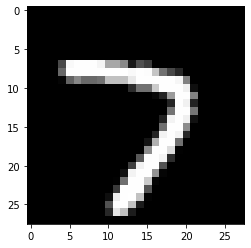

image number: 18
Prediction:  3
Label:  3


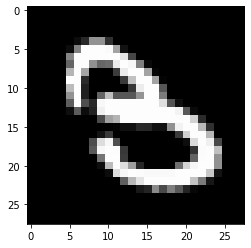

image number: 19
Prediction:  4
Label:  4


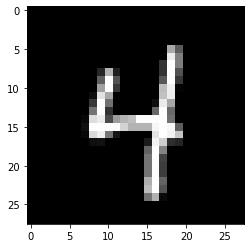

image number: 20
Prediction:  9
Label:  9


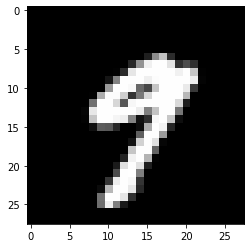

image number: 21
Prediction:  6
Label:  6


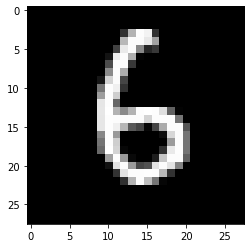

image number: 22
Prediction:  6
Label:  6


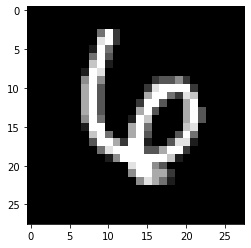

image number: 23
Prediction:  5
Label:  5


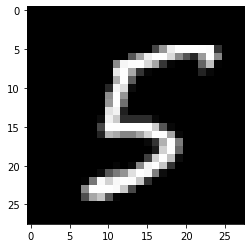

image number: 24
Prediction:  4
Label:  4


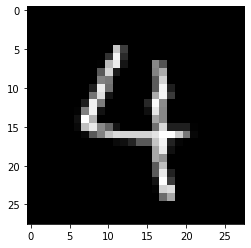

In [88]:
# update_network_weights_and_biases_after_train

net.weights[0] = np.genfromtxt('weights_0.csv', delimiter=',').reshape((784,16))
net.weights[1] = np.genfromtxt('weights_1.csv', delimiter=',').reshape((16,16))
net.weights[2] = np.genfromtxt('weights_2.csv', delimiter=',').reshape((16,10))
net.biases[0] = np.genfromtxt('biases_0.csv', delimiter=',').reshape((16,1))
net.biases[1] = np.genfromtxt('biases_1.csv', delimiter=',').reshape((16,1))
net.biases[2] = np.genfromtxt('biases_2.csv', delimiter=',').reshape((10,1))

accuracy = net.get_accuracy(test_images,test_lables)
print("The accuracy of your network is:", accuracy)


def test_prediction(index,Network):
    current_image = test_images[index]
    prediction = Network.predict(current_image)
    label = np.argmax(test_lables[index])
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

n = len(test_images)
print('Now we will see examples:')

for i in range(1,25):
  print('image number:', i)
  test_prediction(i,net)
